In [1]:
import pandas as pd

file_path = './PoetryFoundationData.csv'
poetry_data_iso = pd.read_csv(file_path, encoding='ISO-8859-1')

poetry_data_iso.info(), poetry_data_iso.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13854 entries, 0 to 13853
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13854 non-null  int64 
 1   Title       13854 non-null  object
 2   Poem        13854 non-null  object
 3   Poet        13854 non-null  object
 4   Tags        12899 non-null  object
dtypes: int64(1), object(4)
memory usage: 541.3+ KB


(None,
    Unnamed: 0                                              Title  \
 0           0  \r\r\n                    Objects Used to Prop...   
 1           1  \r\r\n                    The New Church\r\r\n...   
 2           2  \r\r\n                    Look for Me\r\r\n   ...   
 3           3  \r\r\n                    Wild Life\r\r\n     ...   
 4           4  \r\r\n                    Umbrella\r\r\n      ...   
 
                                                 Poem              Poet Tags  
 0  \r\r\nDog bone, stapler,\r\r\ncribbage board, ...  Michelle Menting  NaN  
 1  \r\r\nThe old cupola glinted above the clouds,...     Lucia Cherciu  NaN  
 2  \r\r\nLook for me under the hood\r\r\nof that ...        Ted Kooser  NaN  
 3  \r\r\nBehind the silo, the Mother Rabbit\r\r\n...   Grace Cavalieri  NaN  
 4  \r\r\nWhen I push your button\r\r\nyou fly off...      Connie Wanek  NaN  )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

column_details = poetry_data_iso.describe(include='all').T
column_details


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,13854.0,NaN,NaN,NaN,93.204417,57.493544,0.0,42.0,92.0,142.0,199.0
Title,13854,13240,\r\r\n Song\r\r\n ...,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poem,13854,13754,\r\r\n\r\r\n,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poet,13854,3128,William Shakespeare,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tags,12899,8297,"Arts & Sciences,Poetry & Poets",106,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-15-2d33a245f2d6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poet_counts.values, y=poet_counts.index, palette='viridis')


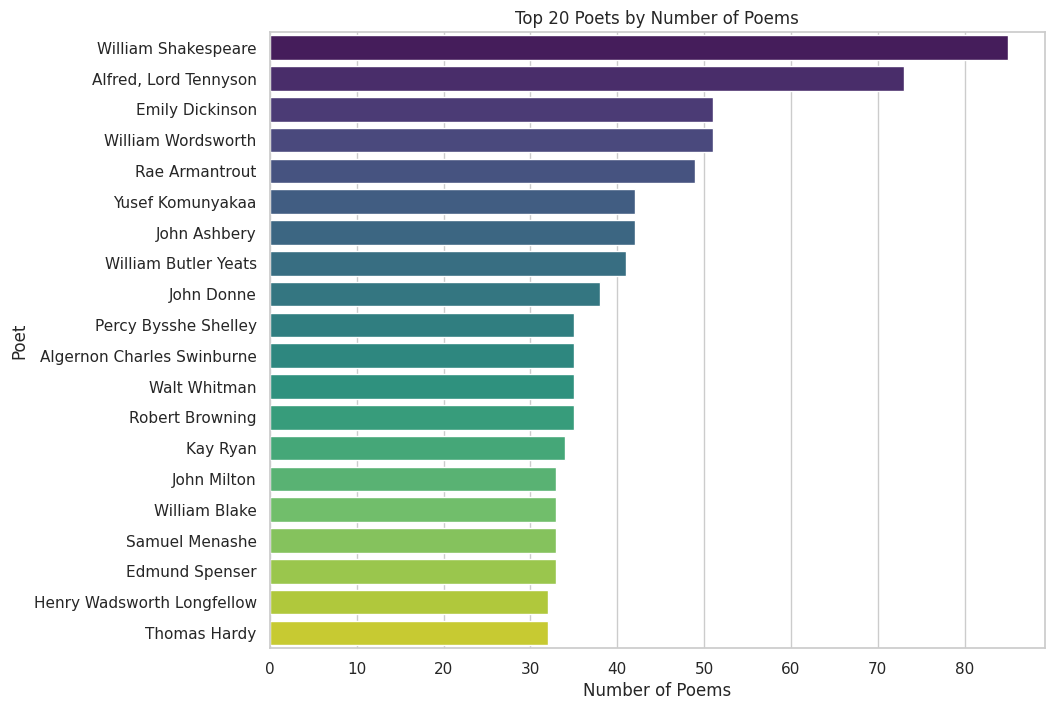

<ipython-input-15-2d33a245f2d6>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='coolwarm')


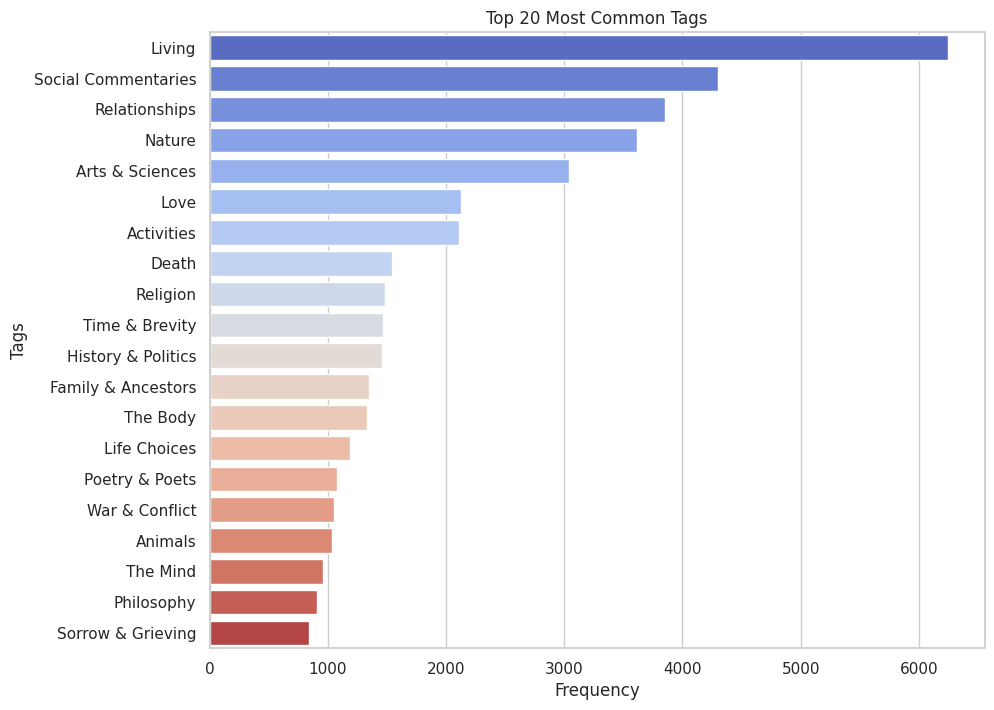

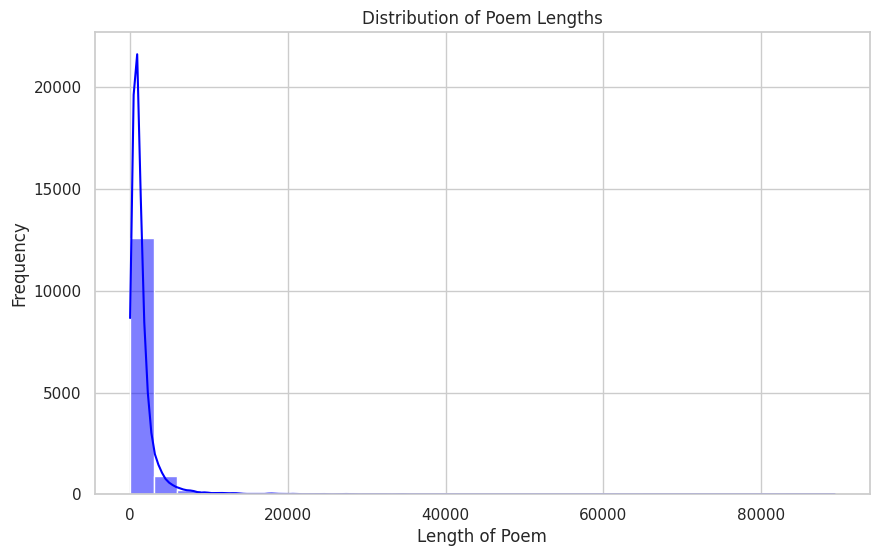

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set chart style
sns.set(style="whitegrid")

# Analysis 1: Distribution of the number of works by poets
poet_counts = poetry_data_iso['Poet'].value_counts().head(20)  # Get the top 20 poets by number of works

# Plot the distribution of poets' work counts
plt.figure(figsize=(10, 8))
sns.barplot(x=poet_counts.values, y=poet_counts.index, palette='viridis')
plt.title('Top 20 Poets by Number of Poems')
plt.xlabel('Number of Poems')
plt.ylabel('Poet')
plt.show()

# Analysis 2: Frequency of poetry tags usage
tags_data = poetry_data_iso['Tags'].dropna().str.split(',').explode()  # Split and expand tags
tag_counts = tags_data.value_counts().head(20)  # Take the top 20 most frequent tags

# Plot the frequency of tag usage
plt.figure(figsize=(10, 8))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='coolwarm')
plt.title('Top 20 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.show()

# Analysis 3: Distribution of poem lengths
poetry_data_iso['Poem Length'] = poetry_data_iso['Poem'].dropna().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(poetry_data_iso['Poem Length'], bins=30, color='blue', kde=True)
plt.title('Distribution of Poem Lengths')
plt.xlabel('Length of Poem')
plt.ylabel('Frequency')
plt.show()



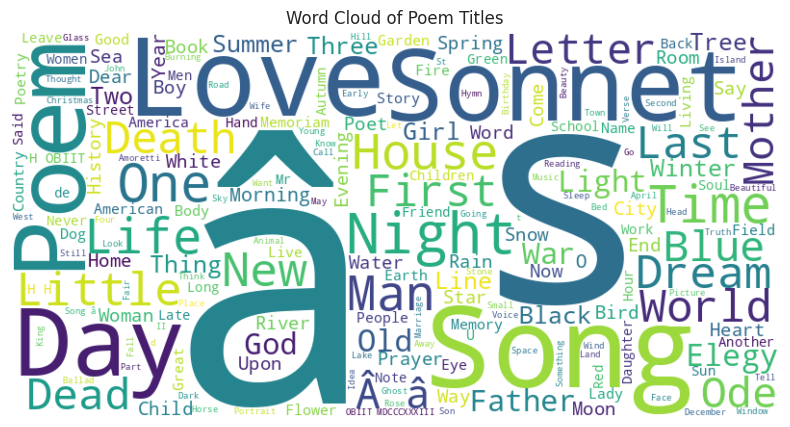

<ipython-input-16-d6edc6ce3fc1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poet_diversity.values, y=poet_diversity.index, palette='magma')


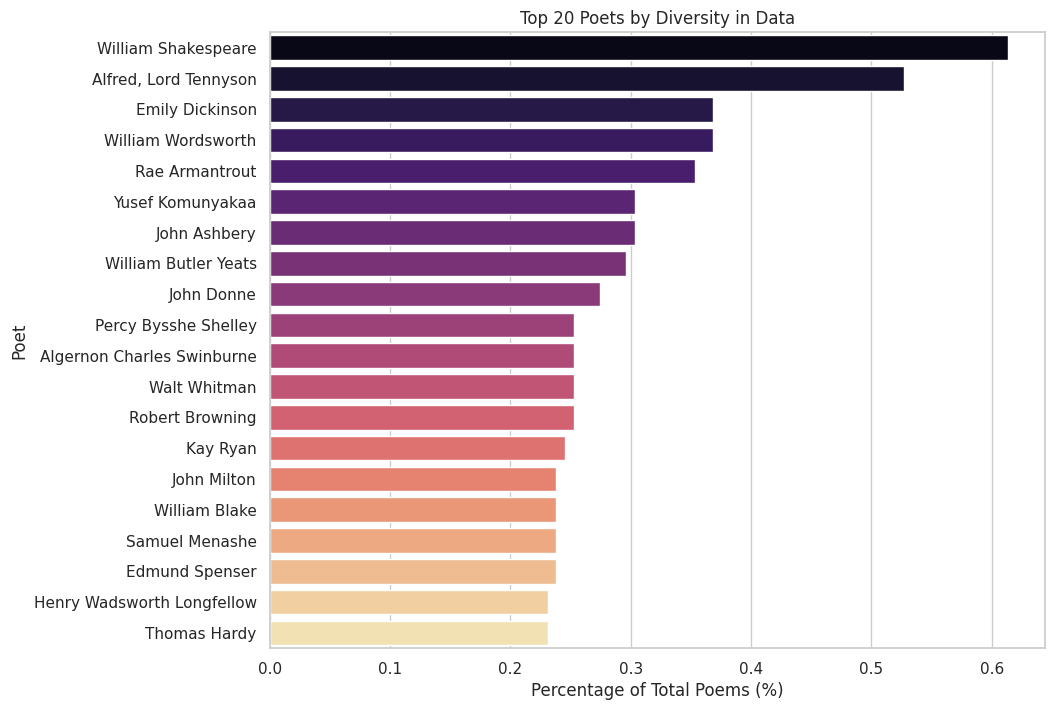

0.9799984494922087

In [16]:
from wordcloud import WordCloud

# Analysis 4: Diversity of poem titles
# Clean title data and generate word cloud
titles_cleaned = poetry_data_iso['Title'].dropna().apply(lambda x: x.strip())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(titles_cleaned))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Poem Titles')
plt.show()

# Analysis 5: Diversity among poets
poet_diversity = poetry_data_iso['Poet'].value_counts(normalize=True).head(20) * 100  # Convert to percentage

# Plot the diversity among poets
plt.figure(figsize=(10, 8))
sns.barplot(x=poet_diversity.values, y=poet_diversity.index, palette='magma')
plt.title('Top 20 Poets by Diversity in Data')
plt.xlabel('Percentage of Total Poems (%)')
plt.ylabel('Poet')
plt.show()

# Analysis 6: Proportion of poems with multiple tags
poetry_data_iso['Tag Count'] = poetry_data_iso['Tags'].dropna().apply(lambda x: len(x.split(',')))
multi_tag_proportion = (poetry_data_iso['Tag Count'] > 1).sum() / len(poetry_data_iso['Tag Count'].dropna())

# Display the proportion of poems with multiple tags
multi_tag_proportion


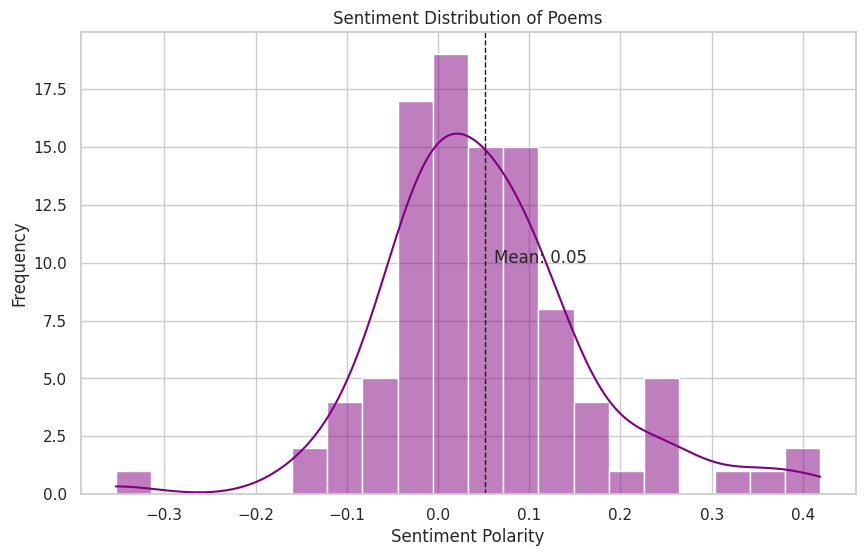

In [17]:
from textblob import TextBlob

# Sentiment analysis on a subset of poem texts
# Analyze the first 100 poems from the sample
sample_poems = poetry_data_iso['Poem'].dropna().head(100)
sentiments = sample_poems.apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the results of the sentiment analysis
plt.figure(figsize=(10, 6))
sns.histplot(sentiments, bins=20, color='purple', kde=True)
plt.title('Sentiment Distribution of Poems')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.axvline(sentiments.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(sentiments.mean()+0.01, 10, f'Mean: {sentiments.mean():.2f}', rotation=0)
plt.show()


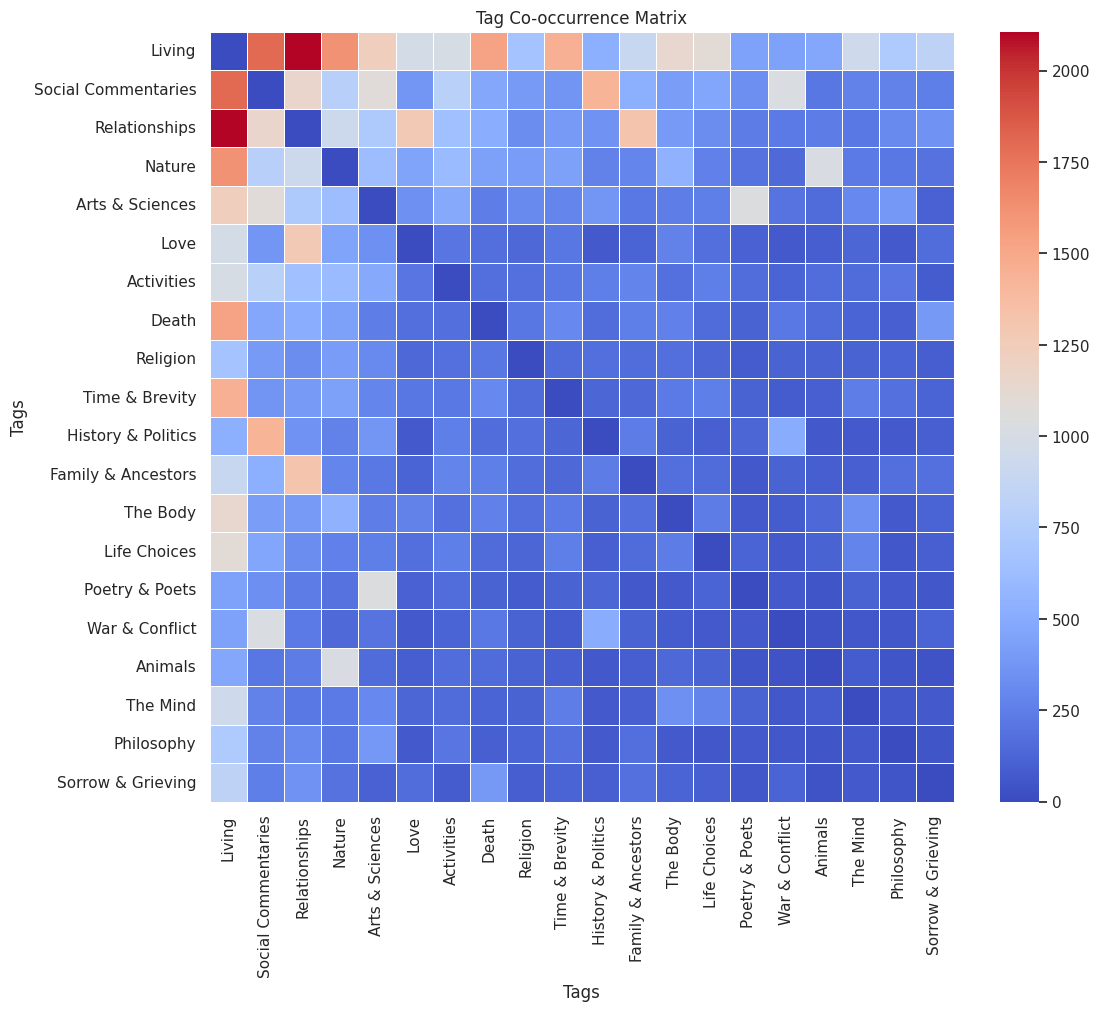

In [18]:
from itertools import combinations
import numpy as np

# Analysis 10: Association analysis of poetry tags
# Prepare tag data
tag_lists = poetry_data_iso['Tags'].dropna().apply(lambda x: x.split(',')).tolist()

# Create tag co-occurrence matrix
unique_tags = list(set([tag.strip() for sublist in tag_lists for tag in sublist]))
co_occurrence_matrix = pd.DataFrame(0, index=unique_tags, columns=unique_tags)

for tags in tag_lists:
    tags = list(set(tag.strip() for tag in tags))  # Remove duplicates within the same list
    for (tag1, tag2) in combinations(tags, 2):
        co_occurrence_matrix.at[tag1, tag2] += 1
        co_occurrence_matrix.at[tag2, tag1] += 1

# Display the co-occurrence of the top 20 tags only, to ensure clarity of the chart
top_tags = tag_counts.index[:20]
filtered_matrix = co_occurrence_matrix.loc[top_tags, top_tags]

# Plot heatmap to show tag co-occurrence frequency
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Tag Co-occurrence Matrix')
plt.xlabel('Tags')
plt.ylabel('Tags')
plt.show()



In [3]:
poetry_data_filtered = poetry_data_iso[['Title', 'Poem', 'Poet', 'Tags']]

filtered_info = poetry_data_filtered.info(), poetry_data_filtered.head()

filtered_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13854 entries, 0 to 13853
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   13854 non-null  object
 1   Poem    13854 non-null  object
 2   Poet    13854 non-null  object
 3   Tags    12899 non-null  object
dtypes: object(4)
memory usage: 433.1+ KB


(None,
                                                Title  \
 0  \r\r\n                    Objects Used to Prop...   
 1  \r\r\n                    The New Church\r\r\n...   
 2  \r\r\n                    Look for Me\r\r\n   ...   
 3  \r\r\n                    Wild Life\r\r\n     ...   
 4  \r\r\n                    Umbrella\r\r\n      ...   
 
                                                 Poem              Poet Tags  
 0  \r\r\nDog bone, stapler,\r\r\ncribbage board, ...  Michelle Menting  NaN  
 1  \r\r\nThe old cupola glinted above the clouds,...     Lucia Cherciu  NaN  
 2  \r\r\nLook for me under the hood\r\r\nof that ...        Ted Kooser  NaN  
 3  \r\r\nBehind the silo, the Mother Rabbit\r\r\n...   Grace Cavalieri  NaN  
 4  \r\r\nWhen I push your button\r\r\nyou fly off...      Connie Wanek  NaN  )

In [4]:
# Calculate the frequency of each tag
tags_series = poetry_data_filtered['Tags'].dropna().str.split(',')
expanded_tags = tags_series.explode()
tag_counts = expanded_tags.value_counts()

# For rows containing multiple tags, only retain the most frequently occurring tag
def keep_most_frequent_tag(tags):
    if pd.isna(tags):
        return tags  # Return directly if NaN
    tags_list = tags.split(',')
    if len(tags_list) > 1:
        # Find the most frequent tag in the row
        most_frequent_tag = max(tags_list, key=lambda x: tag_counts.get(x.strip(), 0))
        return most_frequent_tag.strip()
    return tags.strip()

# Apply the above function to create a new column
poetry_data_filtered['Most_Frequent_Tag'] = poetry_data_filtered['Tags'].apply(keep_most_frequent_tag)

tag_counts, poetry_data_filtered.head()



(Tags
 Living                 6243
 Social Commentaries    4302
 Relationships          3856
 Nature                 3613
 Arts & Sciences        3039
                        ... 
 Yom Kippur                8
 Rosh Hashanah             5
 Hanukkah                  5
 Ramadan                   3
 Cinco de Mayo             1
 Name: count, Length: 129, dtype: int64,
                                                Title  \
 0  \r\r\n                    Objects Used to Prop...   
 1  \r\r\n                    The New Church\r\r\n...   
 2  \r\r\n                    Look for Me\r\r\n   ...   
 3  \r\r\n                    Wild Life\r\r\n     ...   
 4  \r\r\n                    Umbrella\r\r\n      ...   
 
                                                 Poem              Poet Tags  \
 0  \r\r\nDog bone, stapler,\r\r\ncribbage board, ...  Michelle Menting  NaN   
 1  \r\r\nThe old cupola glinted above the clouds,...     Lucia Cherciu  NaN   
 2  \r\r\nLook for me under the hood\r\r\nof that 

In [5]:
most_frequent_tag_distribution = poetry_data_filtered['Most_Frequent_Tag'].value_counts()

most_frequent_tag_distribution


Most_Frequent_Tag
Living                       6243
Social Commentaries          2494
Nature                       1186
Relationships                1180
Arts & Sciences               665
                             ... 
Crime & Punishment              1
Jobs & Working                  1
Midlife                         1
Christianity                    1
Ghosts & the Supernatural       1
Name: count, Length: 68, dtype: int64

In [6]:
top_tags = ['Living', 'Social Commentaries', 'Nature', 'Relationships', 'Arts & Sciences']
filtered_data_with_top_tags = poetry_data_filtered[poetry_data_filtered['Most_Frequent_Tag'].isin(top_tags)]

output_file_path = './FilteredPoetryData_TopTags.csv'
filtered_data_with_top_tags.to_csv(output_file_path, index=False)

output_file_path


'./FilteredPoetryData_TopTags.csv'

In [7]:
new_poetry_data_path = './FilteredPoetryData_TopTags.csv'
new_poetry_data = pd.read_csv(new_poetry_data_path)

## Logistic Regression

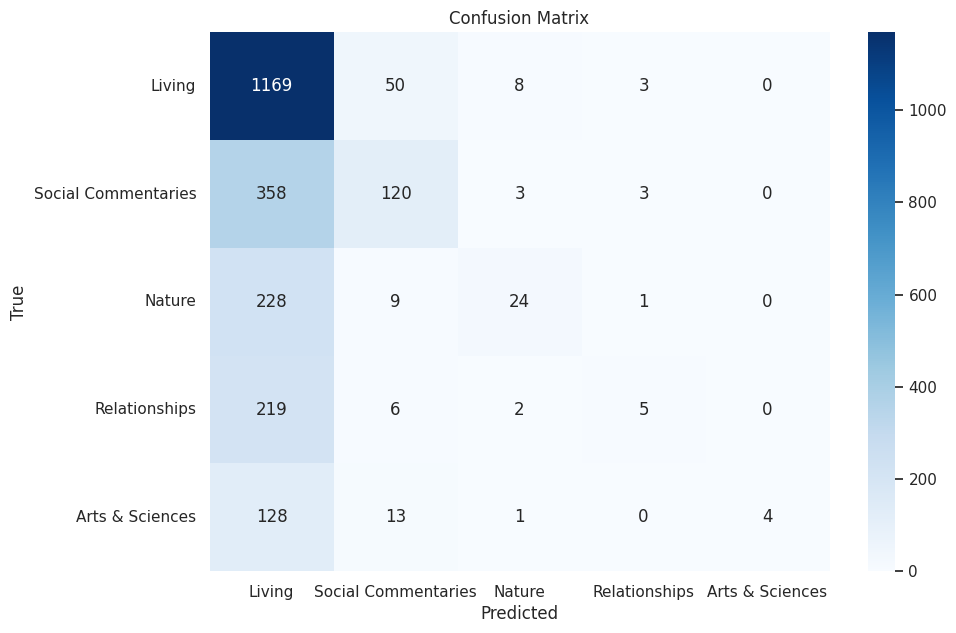

('                     precision    recall  f1-score   support\n\n    Arts & Sciences       1.00      0.03      0.05       146\n             Living       0.56      0.95      0.70      1230\n             Nature       0.63      0.09      0.16       262\n      Relationships       0.42      0.02      0.04       232\nSocial Commentaries       0.61      0.25      0.35       484\n\n           accuracy                           0.56      2354\n          macro avg       0.64      0.27      0.26      2354\n       weighted avg       0.59      0.56      0.46      2354\n',
 0.5615972812234494)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Merge 'Title' and 'Poem' columns into one text feature
new_poetry_data['text'] = new_poetry_data['Title'] + " " + new_poetry_data['Poem']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    new_poetry_data['text'], new_poetry_data['Most_Frequent_Tag'], test_size=0.2, random_state=42
)

# Create a pipeline with TF-IDF vectorization and logistic regression model
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=top_tags)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=top_tags, yticklabels=top_tags, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report, accuracy



## Random Forest

                     precision    recall  f1-score   support

    Arts & Sciences       0.75      0.02      0.04       146
             Living       0.53      1.00      0.69      1230
             Nature       0.50      0.00      0.01       262
      Relationships       1.00      0.00      0.01       232
Social Commentaries       0.68      0.03      0.05       484

           accuracy                           0.53      2354
          macro avg       0.69      0.21      0.16      2354
       weighted avg       0.62      0.53      0.38      2354

Accuracy: 0.5288870008496177


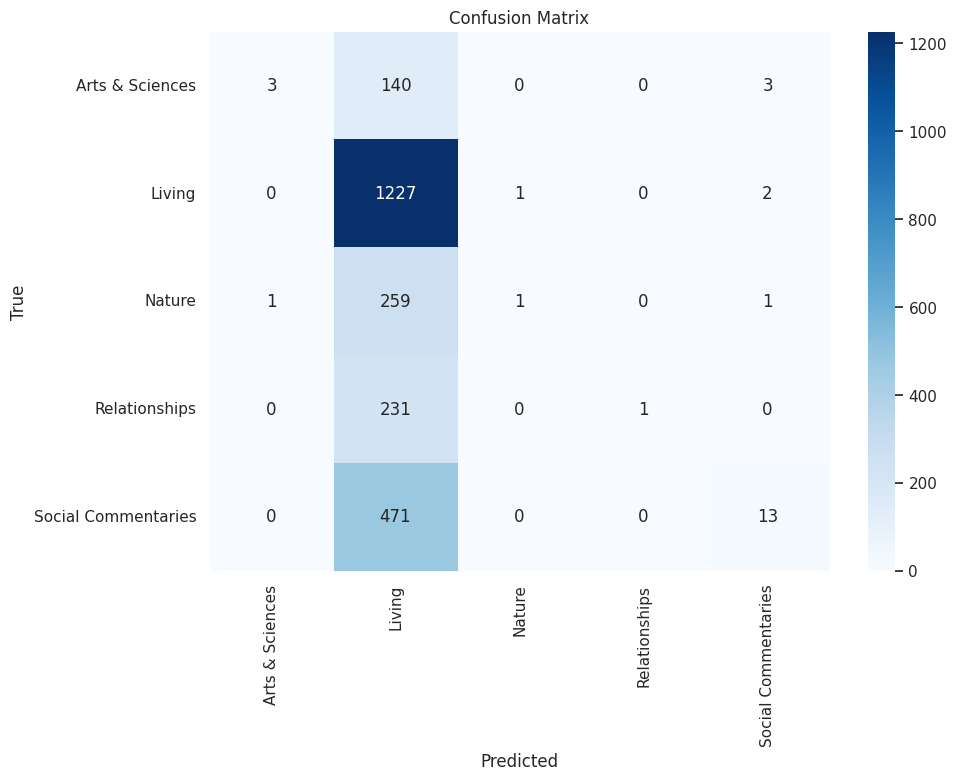

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline with TF-IDF vectorization and Random Forest model
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(report)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Arts & Sciences', 'Living', 'Nature', 'Relationships', 'Social Commentaries'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Arts & Sciences', 'Living', 'Nature', 'Relationships', 'Social Commentaries'], yticklabels=['Arts & Sciences', 'Living', 'Nature', 'Relationships', 'Social Commentaries'], cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## XGBoost

                     precision    recall  f1-score   support

    Arts & Sciences       0.38      0.04      0.07       146
             Living       0.56      0.91      0.69      1230
             Nature       0.45      0.11      0.17       262
      Relationships       0.51      0.08      0.13       232
Social Commentaries       0.51      0.24      0.33       484

           accuracy                           0.55      2354
          macro avg       0.48      0.28      0.28      2354
       weighted avg       0.52      0.55      0.47      2354

Accuracy: 0.5488530161427357


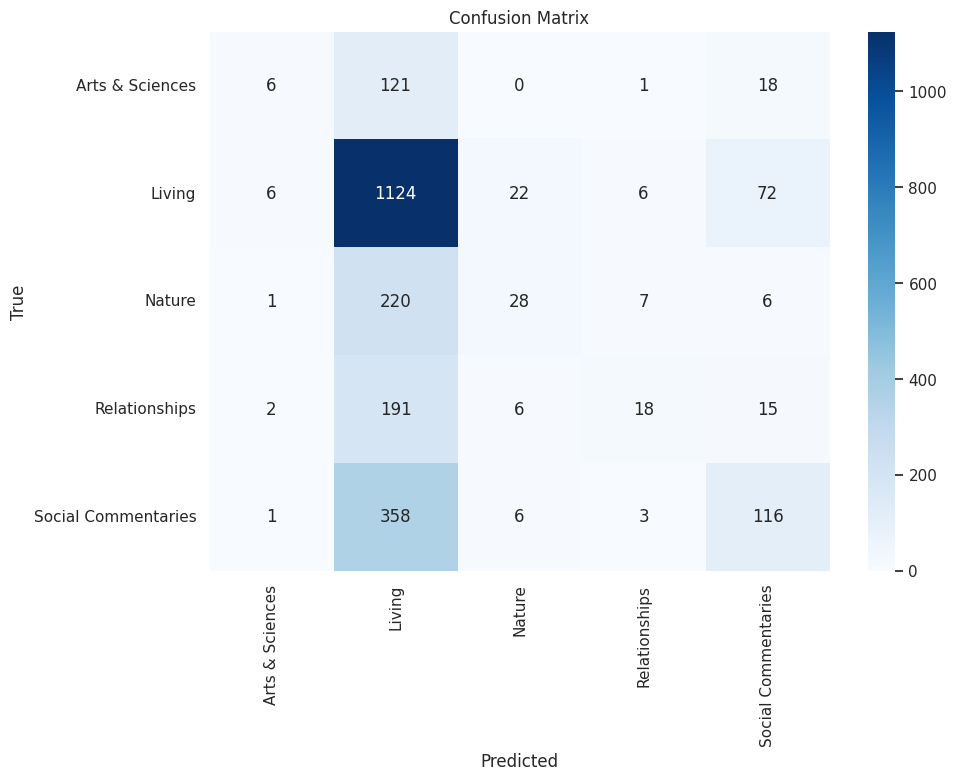

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

new_poetry_data_path = './FilteredPoetryData_TopTags.csv'
data = pd.read_csv(new_poetry_data_path)

# Merge 'Title' and 'Poem' columns into one text feature
data['text'] = data['Title'] + " " + data['Poem']

# Convert category labels from strings to integers
label_encoder = LabelEncoder()
data['Most_Frequent_Tag'] = label_encoder.fit_transform(data['Most_Frequent_Tag'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['Most_Frequent_Tag'], test_size=0.2, random_state=42
)

# Create a pipeline with TF-IDF vectorization and XGBoost model
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test, y_pred)
print(report)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

new_poetry_data_path = './FilteredPoetryData_TopTags.csv'
new_poetry_data = pd.read_csv(new_poetry_data_path)

# Step 1: Text data preprocessing
# Full poems will be used for prediction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_poetry_data['Poem'])
sequences = tokenizer.texts_to_sequences(new_poetry_data['Poem'])
data = pad_sequences(sequences, maxlen=100)  # Padding or truncating to a maximum length of 100

# Step 2: Label encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(new_poetry_data['Most_Frequent_Tag'])

# Check processed data and labels
data.shape, labels.shape, np.unique(labels)



((11768, 100), (11768,), array([0, 1, 2, 3, 4]))

Epoch 1/10
118/118 [==============================] - 110s 882ms/step - loss: 1.3132 - accuracy: 0.5265 - val_loss: 1.2551 - val_accuracy: 0.5454
Epoch 2/10
118/118 [==============================] - 144s 1s/step - loss: 1.1179 - accuracy: 0.5691 - val_loss: 1.3492 - val_accuracy: 0.4758
Epoch 3/10
118/118 [==============================] - 104s 884ms/step - loss: 0.6911 - accuracy: 0.7307 - val_loss: 1.6199 - val_accuracy: 0.4121
Epoch 4/10
118/118 [==============================] - 110s 931ms/step - loss: 0.3731 - accuracy: 0.8534 - val_loss: 2.0635 - val_accuracy: 0.4132
Epoch 5/10
118/118 [==============================] - 123s 1s/step - loss: 0.2124 - accuracy: 0.9226 - val_loss: 2.3893 - val_accuracy: 0.4190
Epoch 6/10
118/118 [==============================] - 106s 898ms/step - loss: 0.0960 - accuracy: 0.9700 - val_loss: 2.8701 - val_accuracy: 0.3967
Epoch 7/10
118/118 [==============================] - 106s 896ms/step - loss: 0.0469 - accuracy: 0.9867 - val_loss: 2.9001 - val_a

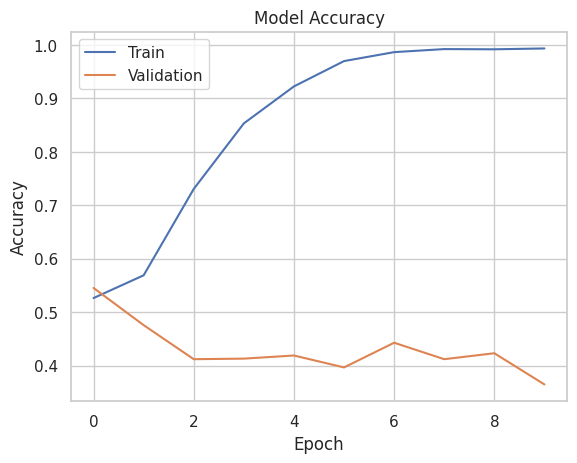

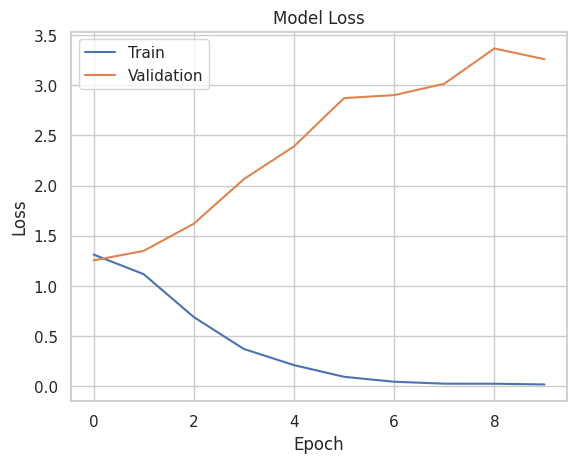

74/74 [==============================] - 6s 66ms/step
                     precision    recall  f1-score   support

    Arts & Sciences       0.11      0.23      0.15       146
             Living       0.56      0.51      0.54      1230
             Nature       0.20      0.06      0.09       262
      Relationships       0.12      0.19      0.14       232
Social Commentaries       0.23      0.23      0.23       484

           accuracy                           0.35      2354
          macro avg       0.24      0.25      0.23      2354
       weighted avg       0.38      0.35      0.36      2354



In [33]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))  # 5 output categories

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


## Neural Network

Epoch 1/3
118/118 [==============================] - 137s 1s/step - loss: 1.3876 - accuracy: 0.5250 - val_loss: 1.3112 - val_accuracy: 0.5454
Epoch 2/3
118/118 [==============================] - 129s 1s/step - loss: 1.2207 - accuracy: 0.5557 - val_loss: 1.3347 - val_accuracy: 0.4865
Epoch 3/3
118/118 [==============================] - 133s 1s/step - loss: 0.8844 - accuracy: 0.6711 - val_loss: 1.5422 - val_accuracy: 0.4647


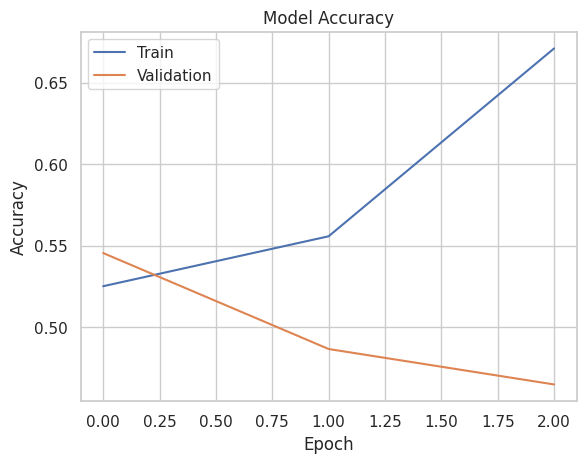

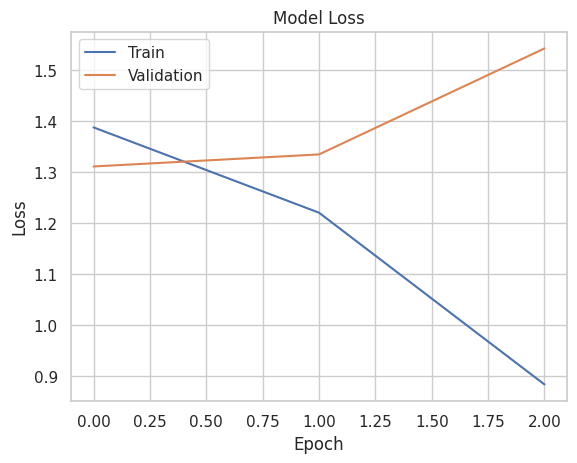

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(0.01)))  # Add L2 regularization

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [2]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
new_poetry_data_path = './FilteredPoetryData_TopTags.csv'
new_poetry_data = pd.read_csv(new_poetry_data_path)

# Text cleaning function
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'\s+', ' ', text)  # Merge extra spaces
    return text.strip()

# Clean text data
new_poetry_data['Cleaned_Poem'] = new_poetry_data['Poem'].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
new_poetry_data['Encoded_Tag'] = label_encoder.fit_transform(new_poetry_data['Most_Frequent_Tag'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    new_poetry_data['Cleaned_Poem'],
    new_poetry_data['Encoded_Tag'],
    test_size=0.2,
    random_state=42
)

X_train.head(), y_train.head()


(957      Godâs name is bare of honour in our hearing,...
 6950     Quarterly, is it, money reproaches me: âWhy ...
 6186     Will you read my little pome, O you girls retu...
 10719    Rose-cheek'd Laura, come, Sing thou smoothly w...
 3592     A sparrow weaves over the derelict terrace the...
 Name: Cleaned_Poem, dtype: object,
 957      4
 6950     1
 6186     0
 10719    3
 3592     1
 Name: Encoded_Tag, dtype: int64)

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.76ea01b4b85ac16e2cec55c398cba7a943d89ab21dfdd973f6630a152e4b9aed
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7

Device: cuda


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 9414
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3531


Step,Training Loss
10,1.760200
20,1.710500
30,1.703900
40,1.636800
50,1.542100
60,1.473200
70,1.329900
80,1.341900
90,1.243800
100,1.232900


Saving model checkpoint to /tmp/tmpnn1wv5mb/checkpoint-500
Configuration saved in /tmp/tmpnn1wv5mb/checkpoint-500/config.json
Model weights saved in /tmp/tmpnn1wv5mb/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /tmp/tmpnn1wv5mb/checkpoint-1000
Configuration saved in /tmp/tmpnn1wv5mb/checkpoint-1000/config.json
Model weights saved in /tmp/tmpnn1wv5mb/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to /tmp/tmpnn1wv5mb/checkpoint-1500
Configuration saved in /tmp/tmpnn1wv5mb/checkpoint-1500/config.json
Model weights saved in /tmp/tmpnn1wv5mb/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /tmp/tmpnn1wv5mb/checkpoint-2000
Configuration saved in /tmp/tmpnn1wv5mb/checkpoint-2000/config.json
Model weights saved in /tmp/tmpnn1wv5mb/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to /tmp/tmpnn1wv5mb/checkpoint-2500
Configuration saved in /tmp/tmpnn1wv5mb/checkpoint-2500/config.json
Model weights saved in /tmp/tmpnn1wv5mb/checkpoint-2500/pytorch_mod

***** Running Prediction *****
  Num examples = 2354
  Batch size = 16


{'eval_loss': 1.4010961055755615, 'eval_accuracy': 0.5985556499575191, 'eval_f1': 0.5870121667979482, 'eval_precision': 0.5834030152707108, 'eval_recall': 0.5985556499575191, 'eval_runtime': 86.1248, 'eval_samples_per_second': 27.332, 'eval_steps_per_second': 1.718, 'epoch': 3.0}


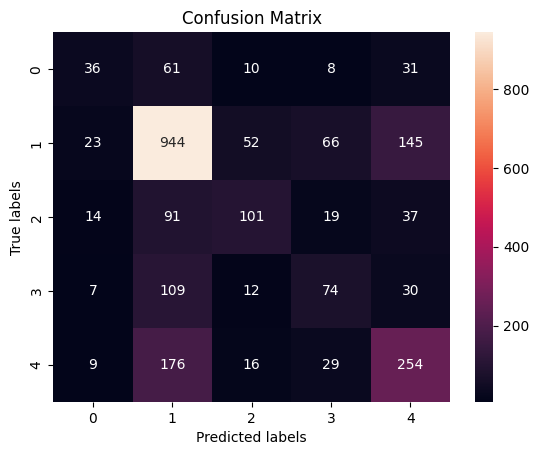

In [6]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import tempfile
import seaborn as sns

# Create a temporary directory
temp_dir = tempfile.mkdtemp()

# Define a dataset class for handling text and labels
class PoetryDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


# Load pretrained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Move model to the available device
model.to(device)

# Encode training and testing data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

# Create training and testing datasets
train_dataset = PoetryDataset(train_encodings, list(y_train))
test_dataset = PoetryDataset(test_encodings, list(y_test))

# Set training parameters
training_args = TrainingArguments(
    output_dir=temp_dir,          # Output directory
    num_train_epochs=3,           # Number of training epochs
    per_device_train_batch_size=8,   # Training batch size
    per_device_eval_batch_size=16,   # Evaluation batch size
    warmup_steps=500,                # Warmup steps
    weight_decay=0.01,               # Weight decay
    logging_steps=10,
)

# Define evaluation function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model on the test dataset
results = trainer.evaluate()

# Print evaluation metrics
print(results)

# Plot the confusion matrix
y_pred = np.argmax(trainer.predict(test_dataset).predictions, axis=-1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [12]:
!pip install transformers==4.17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 50.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1
